In [36]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

# coding=utf-8
import logging
import sys
import logging.handlers

# 获取logger实例，空，则返回root logger
logger = logging.getLogger('backtest')
# 指定输出格式
formatter = logging.Formatter(
    '%(asctime)s %(levelname)s in line %(lineno)d  |||| %(message)s')
# 日志保存到文件
filepath = 'backtest_error.log'
file_handler = logging.handlers.TimedRotatingFileHandler(
    filepath, when='midnight', interval=1, backupCount=10)
file_handler.setFormatter(formatter)
# 日志输出到控制台
console_handler = logging.StreamHandler(sys.stdout)
console_handler.formatter = formatter
logger.addHandler(file_handler)
logger.addHandler(console_handler)
# 指定输出级别
logger.setLevel(logging.INFO)

In [24]:
root = "C:/Users/workspace/brad_public_workspace_on_win/SH_tongliang/reports/TB回测交易记录/"
file = "Brad_6对商品期货配对_12_17_资产变化.csv"

In [25]:
# 把Bar#的column删掉，然后再导入：
df = pd.read_csv(root+file, engine="python")

In [37]:
df.head()

,time,long_margin,short_margin,capital_available,floating_equity,trading_costs,static_equity,accum_returns
1447,2013-01-04,0.0,0.0,2500000.13,2500000.13,0.0,2500000.13,0.0
1446,2013-01-07,0.0,0.0,2500000.13,2500000.13,0.0,2500000.13,0.0
1445,2013-01-08,0.0,0.0,2500000.13,2500000.13,0.0,2500000.13,0.0
1444,2013-01-09,0.0,0.0,2500000.13,2500000.13,0.0,2500000.13,0.0
1443,2013-01-10,0.0,0.0,2500000.13,2500000.13,0.0,2500000.13,0.0


In [28]:
df.columns = ['time', 'long_margin', 'short_margin', 'capital_available', 'floating_equity', 'trading_costs', 'static_equity', 'accum_returns']
df['time'] = pd.to_datetime(df['time'])
df.sort_values('time', inplace=True)

equity = df.copy()
equity.index = equity['time']
equity = equity[['floating_equity']]

In [31]:
def duration_of_equity_not_reaching_high(equity):
    """权益最长未创新高的持续时间"""
    # equity = context.fill.equity.df
    logger.debug('---equity in analysis---: {}'.format(equity))
    max_equity = 0
    duration = pd.Timedelta(0)  # 时间间隔为 0
    date_list = []
    date_dur = pd.DataFrame(columns=['duration', 'start', 'end'])
    for i in range(equity.shape[0]):
        if max_equity <= equity.values[i][0]: #
            max_equity = equity.values[i][0]
            date_list.append(equity.index[i])
    logger.debug('---date_list---: {}'.format(date_list))
    for j in range(len(date_list) - 1):  # len()-1
        duration_ = date_list[j + 1] - date_list[j]

        date_dur = date_dur.append(pd.Series(
            [duration_, date_list[j], date_list[j + 1]], index=['duration', 'start', 'end']), ignore_index=True)
        #
        # if duration < duration_:
        #     duration = duration_
        #     date_dict[duration] = [date_list[i], date_list[i + 1]]

    # date = date_dict[max(date_dict)][0] + '-' + date_dict[max(date_dict)][1]
    date_dur = date_dur.sort_values('duration')
    start_date = date_dur.iloc[-1]['start']
    if equity.iloc[-1].values <= max_equity:
        deltta = equity.index[-1] - date_list[-1]
        start_date = date_list[-1]
        end_date = equity.index[-1]
    else:
        end_date = date_dur.iloc[-1]['end']
    date = start_date.strftime('%Y-%m-%d') + ' - ' + \
        end_date.strftime('%Y-%m-%d')
    logger.debug('---date in analysis---: {}'.format(date))
#     return date
    return date_dur

In [32]:
date_dur = duration_of_equity_not_reaching_high(equity)

In [38]:
date_dur.tail()

,duration,start,end
188,64 days,2015-01-21,2015-03-26
300,69 days,2018-01-24,2018-04-03
235,96 days,2016-02-19,2016-05-25
261,98 days,2016-11-25,2017-03-03
314,228 days,2018-04-26,2018-12-10


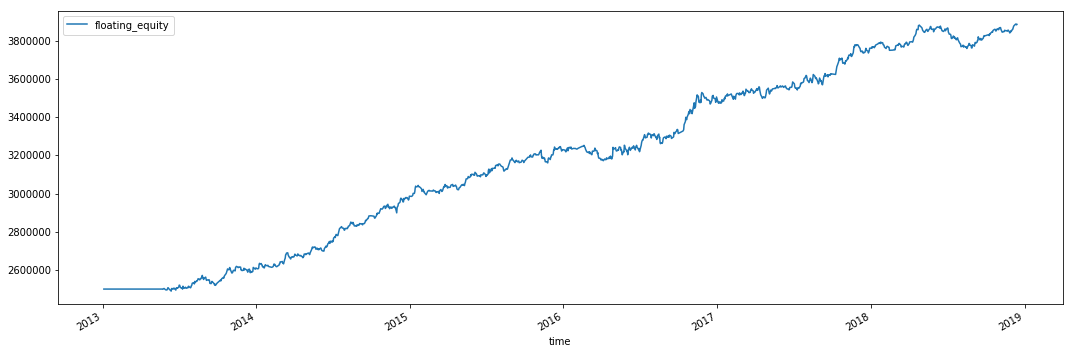

In [34]:
equity.plot(figsize=(18, 6))

# Build into all-in-one function

In [35]:
root_2 = root
file_2 = "Brad_6对商品期货配对分开组合回测结果_v2.csv"

In [43]:
def AIO_get_max_down_dur(root, file):
    # delete #Bar column in the file before putting root and file into the function.
    df = pd.read_csv(root+file, engine="python")
    
    df.columns = ['time', 'long_margin', 'short_margin', 'capital_available', 'floating_equity', 'trading_costs', 'static_equity', 'accum_returns']
    df['time'] = pd.to_datetime(df['time'])
    df.sort_values('time', inplace=True)

    equity = df.copy()
    equity.index = equity['time']
    equity = equity[['floating_equity']]
    
    """权益最长未创新高的持续时间"""
    logger.debug('---equity in analysis---: {}'.format(equity))
    max_equity = 0
    duration = pd.Timedelta(0)  # 时间间隔为 0
    date_list = []
    date_dur = pd.DataFrame(columns=['duration', 'start', 'end'])
    for i in range(equity.shape[0]):
        if max_equity <= equity.values[i][0]: #
            max_equity = equity.values[i][0]
            date_list.append(equity.index[i])
    logger.debug('---date_list---: {}'.format(date_list))
    for j in range(len(date_list) - 1):  # len()-1
        duration_ = date_list[j + 1] - date_list[j]

        date_dur = date_dur.append(pd.Series(
            [duration_, date_list[j], date_list[j + 1]], index=['duration', 'start', 'end']), ignore_index=True)

    date_dur = date_dur.sort_values('duration')
    start_date = date_dur.iloc[-1]['start']
    if equity.iloc[-1].values <= max_equity:
        deltta = equity.index[-1] - date_list[-1]
        start_date = date_list[-1]
        end_date = equity.index[-1]
    else:
        end_date = date_dur.iloc[-1]['end']
    date = start_date.strftime('%Y-%m-%d') + ' - ' + \
        end_date.strftime('%Y-%m-%d')
    logger.debug('---date in analysis---: {}'.format(date))
#     return date
    return date_dur, equity

In [44]:
date_dur, equity = AIO_get_max_down_dur(root_2, file_2)

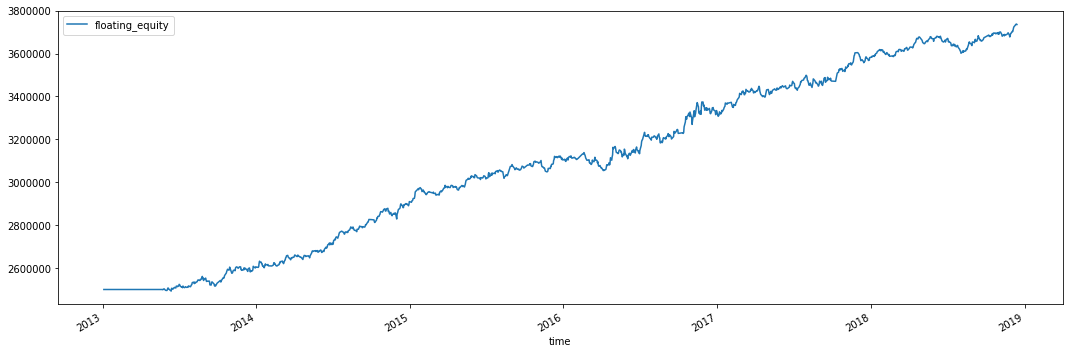

In [46]:
equity.plot(figsize=(18, 6))

In [47]:
date_dur

,duration,start,end
172,1 days,2014-10-20,2014-10-21
167,1 days,2014-09-24,2014-09-25
168,1 days,2014-09-25,2014-09-26
344,1 days,2018-12-11,2018-12-12
173,1 days,2014-10-21,2014-10-22
174,1 days,2014-10-22,2014-10-23
175,1 days,2014-10-23,2014-10-24
177,1 days,2014-10-29,2014-10-30
178,1 days,2014-10-30,2014-10-31
182,1 days,2014-12-09,2014-12-10


In [54]:
9*3509*10*0.1

31581.0

In [55]:
9*3580

32220